In [1]:
import pandas
import plotGrid
import matplotlib.pyplot as pyplot
import rollingAnalysis
import numpy
from datetime import datetime

sales = pandas.read_csv("sales.csv").drop('Unnamed: 0', axis = 1)
daily_sales = pandas.read_csv("daily_sales.csv")
orders = pandas.read_csv("orders.csv")
pizza_properties = pandas.read_csv("pizza_properties.csv")
ingredient_properties = pandas.read_csv("ingredient_properties.csv")

daily_sales.index = daily_sales["Unnamed: 0"].tolist()
daily_sales = daily_sales.drop('Unnamed: 0', axis = 1)
orders.index = orders["Unnamed: 0"].tolist()
orders = orders.drop('Unnamed: 0', axis = 1)
pizza_properties.index = pizza_properties["Unnamed: 0"].tolist()
pizza_properties = pizza_properties.drop('Unnamed: 0', axis = 1)
ingredient_properties.index = ingredient_properties["Unnamed: 0"].tolist()
ingredient_properties = ingredient_properties.drop('Unnamed: 0', axis = 1)

#convert ingredients to lists
sales["pizza_ingredients"] = sales["pizza_ingredients"].apply(lambda ingredients: ingredients.split(", "))
pizza_properties["ingredients"] = pizza_properties["ingredients"].apply(lambda ingredients: ingredients.split(", "))
ingredient_properties["pizza_types_containing"] = ingredient_properties["pizza_types_containing"].apply(lambda ingredients: ingredients.split(", "))

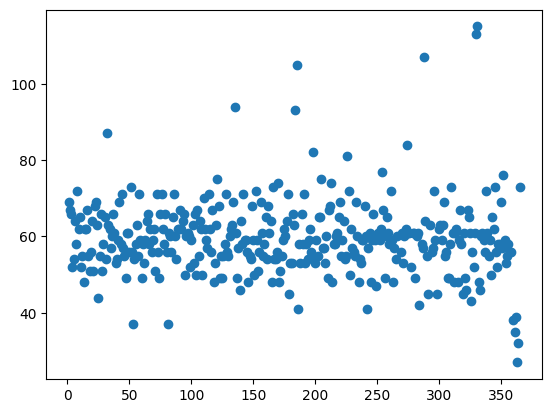

In [2]:
pyplot.scatter(x = daily_sales.index, y = daily_sales["order_count"])

In [3]:
daily_sales.loc[305]

order_count            55
item_count            124
revenue           1986.65
date           2015-11-01
weekday            Sunday
Name: 305, dtype: object

([<matplotlib.axis.XTick at 0x1d48f304710>,
 [Text(0, 0, 'January'),
  Text(60, 0, 'March'),
  Text(121, 0, 'May'),
  Text(182, 0, 'July'),
  Text(244, 0, 'Sept.'),
  Text(305, 0, 'Nov.')])

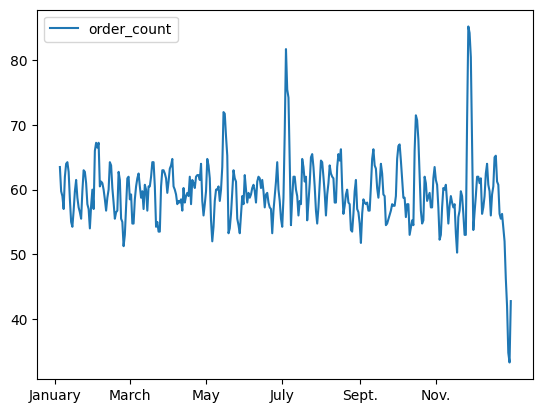

In [4]:
#let's take a look at the items sold per day as a rolling average
# choosing 3 here gives us exactly a 7 day rolling average
rollingAnalysis.plotRollingData(
    ["order_count"], daily_sales,
    3
)
pyplot.xticks([0, 60, 121, 182, 244, 305], ["January", "March", "May", "July", "Sept.", "Nov."])
# there's a big drop in december
# otherwise, very little change in sales across the year

([<matplotlib.axis.XTick at 0x1d48f344380>,
 [Text(0, 0, 'January'),
  Text(60, 0, 'March'),
  Text(121, 0, 'May'),
  Text(182, 0, 'July'),
  Text(244, 0, 'Sept.'),
  Text(305, 0, 'Nov.')])

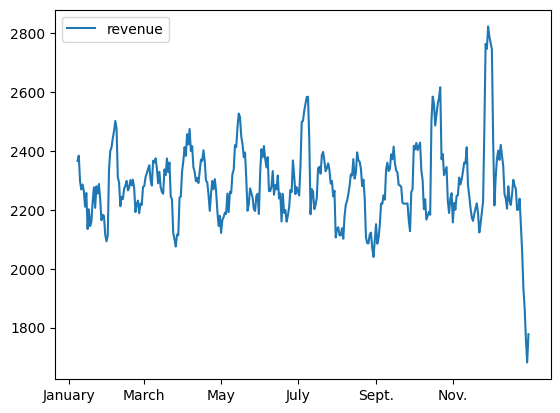

In [5]:
# plot rolling average
rollingAnalysis.plotRollingData(
    ["revenue"], daily_sales,
    6
)
pyplot.xticks([0, 60, 121, 182, 244, 305], ["January", "March", "May", "July", "Sept.", "Nov."])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d48f3f40e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d48f412690>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d48f412150>,
 'medians': [<matplotlib.lines.Line2D at 0x1d48f412c60>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d48f412ed0>,
 'means': []}

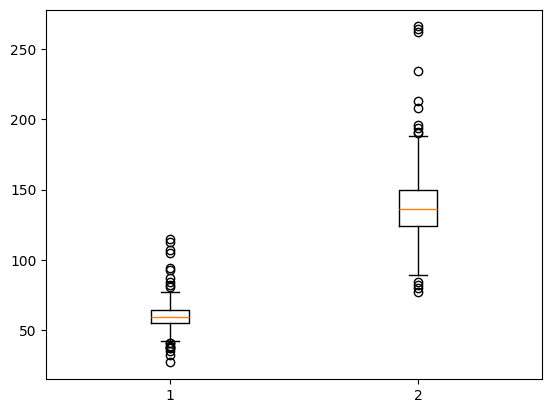

In [6]:
#let's find some outliers
pyplot.boxplot(x = [daily_sales["order_count"], daily_sales["item_count"]])
#this looks very normal/symmetrical around the inner 90%ish of values

In [7]:
#proceed to find outliers via 1.5IQR method 
order_q_25 = daily_sales["order_count"].quantile(0.25)
order_q_75 = daily_sales["order_count"].quantile(0.75)
order_iqr = order_q_75 - order_q_25
order_q_50 = daily_sales["order_count"].quantile(0.5)

high_orders = daily_sales[daily_sales["order_count"] > order_q_50 + 1.5*order_iqr]
low_orders = daily_sales[daily_sales["order_count"] < order_q_50 - 2*order_iqr]


item_q_25 = daily_sales["item_count"].quantile(0.25)
item_q_75 = daily_sales["item_count"].quantile(0.75)
item_iqr = item_q_75 - item_q_25
item_q_50 = daily_sales["item_count"].quantile(0.5)

high_items = daily_sales[daily_sales["item_count"] > item_q_50 + 1.5*item_iqr]
low_items = daily_sales[daily_sales["item_count"] < item_q_50 - 1.5*item_iqr]

In [8]:
low_items
# nearly all the lowest days are on sundays
# the lowest days near the end of the year are right after christmas.
# people do not order much pizza around that time apparently (notice the graph)

,order_count,item_count,revenue,date,weekday
81,37,77,1259.25,2015-03-22,Sunday
109,50,95,1527.95,2015-04-19,Sunday
179,45,95,1569.70,2015-06-28,Sunday
186,41,96,1591.45,2015-07-05,Sunday
242,41,94,1494.60,2015-08-30,Sunday
249,47,92,1491.65,2015-09-06,Sunday
326,43,84,1368.70,2015-11-22,Sunday
360,38,95,1643.05,2015-12-26,Saturday
361,35,89,1419.00,2015-12-27,Sunday
363,27,80,1353.25,2015-12-29,Tuesday


In [9]:
low_orders
# ditto from above

,order_count,item_count,revenue,date,weekday
53,37,97,1579.95,2015-02-22,Sunday
81,37,77,1259.25,2015-03-22,Sunday
360,38,95,1643.05,2015-12-26,Saturday
361,35,89,1419.00,2015-12-27,Sunday
362,39,102,1637.20,2015-12-28,Monday
363,27,80,1353.25,2015-12-29,Tuesday
364,32,82,1337.80,2015-12-30,Wednesday


In [10]:
high_items
# nearly all the highest days are on Thursday or Friday
# sunday february 1st has...no good explanation as far as i can tell, i dunno
# tuesday march 17th is st patricks day
# friday may 15th is "peace officers memorial day"
# can't tell for june 1st either
# 4th of july and 3rd of july had major spikes
# october 10th is a big standout, but i can't really see why?
# thanksgiving has a noticeable spike
# some very specific holidays have notable spikes as well

,order_count,item_count,revenue,date,weekday
32,87,191,3189.20,2015-02-01,Sunday
72,71,176,2786.65,2015-03-13,Friday
76,71,179,2965.30,2015-03-17,Tuesday
128,71,181,3052.30,2015-05-08,Friday
135,94,208,3386.15,2015-05-15,Friday
149,68,181,3001.20,2015-05-29,Friday
152,72,184,3067.75,2015-06-01,Monday
184,93,213,3443.00,2015-07-03,Friday
185,105,234,3864.20,2015-07-04,Saturday
198,82,187,3131.65,2015-07-17,Friday


In [11]:
high_orders
# ditto from above (mostly)

,order_count,item_count,revenue,date,weekday
32,87,191,3189.20,2015-02-01,Sunday
51,73,175,2891.15,2015-02-20,Friday
121,75,154,2571.95,2015-05-01,Friday
135,94,208,3386.15,2015-05-15,Friday
166,73,152,2595.60,2015-06-15,Monday
170,74,167,2793.45,2015-06-19,Friday
184,93,213,3443.00,2015-07-03,Friday
185,105,234,3864.20,2015-07-04,Saturday
198,82,187,3131.65,2015-07-17,Friday
205,75,196,3204.40,2015-07-24,Friday


In [12]:
daily_sales[["item_count", "order_count", "weekday"]].groupby("weekday").mean()

# thursday and saturday are more popular for ordering pizza
# friday, however, is even more popular

,item_count,order_count
weekday,,
Friday,164.840000,70.760000
Monday,135.104167,58.208333
Saturday,144.096154,60.730769
Sunday,116.057692,50.461538
Thursday,143.807692,62.288462
Tuesday,132.596154,57.173077
Wednesday,133.576923,58.153846


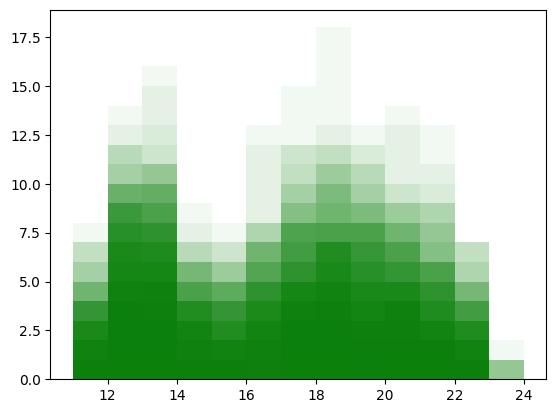

In [13]:
# overlay bar graphs of which hours people are ordering food
for date_index in range(2, 365, 7):
    orders_this_day = orders[orders["order_date_index"] == date_index]
    order_times = orders_this_day["order_time"].apply(lambda time: datetime.strptime(time, "%H:%M:%S").hour)
    pyplot.hist(order_times, bins = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], alpha = 0.05, color = "green")

C:\Users\Spencer\AppData\Local\Temp\ipykernel_31316\3776668610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_times["order_time"] = order_times["order_time"].apply(lambda time: datetime.strptime(time, "%H:%M:%S").hour)
C:\Users\Spencer\AppData\Local\Temp\ipykernel_31316\3776668610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_times["order_time"] = order_times["order_time"].apply(lambda time: datetime.strptime(time, "%H:%M:%S").hour)


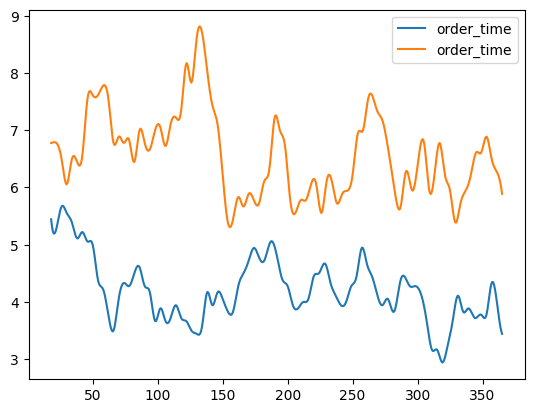

In [14]:
# keep an eye on 2, 5 pm
for time_index in [14, 17]:
    order_times = orders[["order_time", "order_date_index"]]
    order_times["order_time"] = order_times["order_time"].apply(lambda time: datetime.strptime(time, "%H:%M:%S").hour)
    order_times = order_times[order_times["order_time"] == time_index]
    order_times = order_times.groupby("order_date_index").count()
    rollingAnalysis.plotRollingData(["order_time"], order_times, 17, spline = 3)

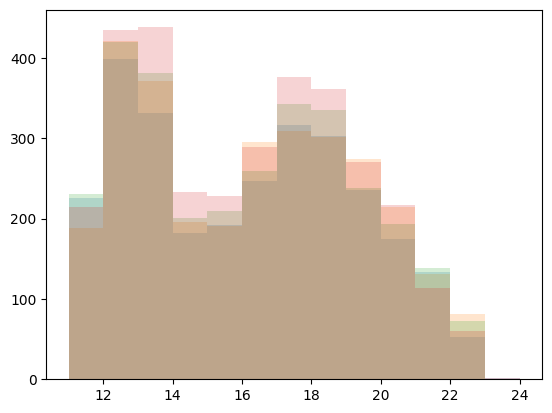

In [15]:
# Monday, Tuesday, Wednesday, and Thursday are pretty similar.
# first peak is 12 PM - 2 PM. second smaller peak rounds out at 5 PM - 7 PM

# Friday is somewhat similar to the other weekdays
# its first peak is 12 PM - 2 PM but its second peak is 5 PM - 8 PM
# that peak happens later in the day, and then more people order pizza as the night goes on than on weekdays

# Saturday has a peak at 1 PM - 2 PM
# then it rises significantly and peaks similar to friday at 5 PM - 8 PM.
# fridays have more sales because of the huge lunch rush that happens

# Sunday afternoon is most similar to Monday - Thursday, but the first peak happens at the same time as Saturday
# so first peak 1 PM - 2 PM, second peak 5 PM - 7 PM

# we can directly see that sales go up as the week goes on
# weekdays cause big lunch rushes
# weekends cause small lunch rushes
# if the day after is a weekend, pizzas are ordered later
# otherwise they are typically ordered a bit earlier

for weekday in ["Monday", "Tuesday", "Wednesday", "Thursday"]:
    orders_this_weekday = orders[orders["order_date_weekday"] == weekday]
    order_times = orders_this_weekday["order_time"].apply(lambda time: datetime.strptime(time, "%H:%M:%S").hour)

    pyplot.hist(order_times, bins = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], alpha = 0.2)

In [16]:
pizza_properties

,price_S,price_M,price_L,price_XL,price_XXL,ingredients,quantity_sold,category
The Hawaiian Pizza,10.50,13.25,16.50,NaN,NaN,"[Sliced Ham, Pineapple, Mozzarella Cheese]",2422,Classic
The Classic Deluxe Pizza,12.00,16.00,20.50,NaN,NaN,"[Pepperoni, Mushrooms, Red Onions, Red Peppers...",2453,Classic
The Five Cheese Pizza,NaN,NaN,18.50,NaN,NaN,"[Mozzarella Cheese, Provolone Cheese, Smoked G...",1409,Veggie
The Italian Supreme Pizza,12.50,16.50,20.75,NaN,NaN,"[Calabrese Salami, Capocollo, Tomatoes, Red On...",1884,Supreme
The Mexicana Pizza,12.00,16.00,20.25,NaN,NaN,"[Tomatoes, Red Peppers, Jalapeno Peppers, Red ...",1484,Veggie
The Thai Chicken Pizza,12.75,16.75,20.75,NaN,NaN,"[Chicken, Pineapple, Tomatoes, Red Peppers, Th...",2371,Chicken
The Prosciutto and Arugula Pizza,12.50,16.50,20.75,NaN,NaN,"[Prosciutto di San Daniele, Arugula, Mozzarell...",1457,Supreme
The Barbecue Chicken Pizza,12.75,16.75,20.75,NaN,NaN,"[Barbecued Chicken, Red Peppers, Green Peppers...",2432,Chicken
The Greek Pizza,12.00,16.00,20.50,25.5,35.95,"[Kalamata Olives, Feta Cheese, Tomatoes, Garli...",1420,Classic
The Spinach Supreme Pizza,12.50,16.50,20.75,NaN,NaN,"[Spinach, Red Onions, Pepperoni, Tomatoes, Art...",950,Supreme


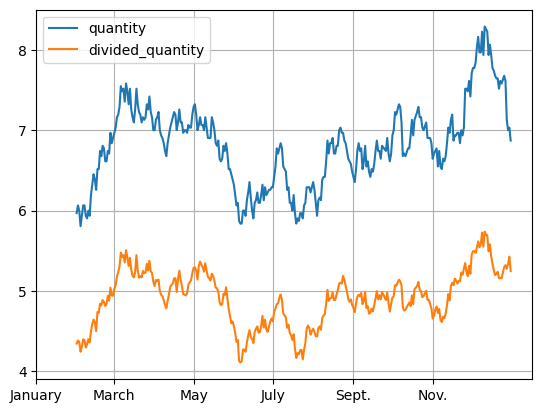

In [17]:
pizza_sales_by_day = sales[["pizza_name", "order_date_index", "quantity"]].groupby(["pizza_name", "order_date_index"]).sum()

out = pandas.DataFrame(columns = ["quantity"])
for order_date_index in daily_sales.index:
    try:
        sales_today = pizza_sales_by_day["quantity"][("The Hawaiian Pizza", order_date_index)]
    except:
        sales_today = 0
    out.loc[order_date_index] = sales_today

out["divided_quantity"] = out["quantity"]/daily_sales["item_count"]

# the "divided quantity" is artificially scaled up here for visibility
# it does not reflect the actual numbers, but it does reflect the shape of the data
rollingAnalysis.plotRollingData(["quantity", "divided_quantity"], out, 30, scales = [1, 100])

pyplot.xticks([0, 60, 121, 182, 244, 305], ["January", "March", "May", "July", "Sept.", "Nov."])
pyplot.grid()

# individual comments for every pizza type:
# The Brie Carre Pizza - walk range ~40%, upward trend in middle of year and spike at start, 
# The Mediterranean Pizza - walk range ~10%, gained popularity at the start of the year and kept it
# The Calabrese Pizza - unstable, walk range ~10% (?), gained in popularity during summer and late fall
# The Spinach Supreme Pizza - walk range ~10%, stable, trending down at end
# The Soppressata Pizza - walk range ~15%, stable, trending downward at end
# The Spinach Pesto Pizza - walk range of ~20%, stable*
# The Chicken Pesto Pizza - walk range of ~20%, stable
# The Italian Vegetables Pizza - walk range of ~5%, trending downward at start then back up at end - possible seasonal preference?
# The Chicken Alfredo Pizza - walk range of ~10%, bumps up around november
# The Green Garden Pizza - walk range of ~10%, slow climb at start of year, huge drop at end

# The Pepperoni, Mushroom, and Peppers Pizza - walk range of ~5%, slow climb throughout year, huge drop at end
# The Five Cheese Pizza - walk range of ~10%?, climbs down then back up at start of year, big drop at end
# The Greek Pizza - walk range of ~10% (?), spikes down then up then down at start of year, drops slightly at end
# The Italian Capocollo Pizza - walk range of ~5%
# The Pepper Salami Pizza - walk range of ~10%, slight uptick at end of year
# The Spinach and Feta Pizza - walk range of ~5%, falls off at end of year
# The Prosciutto and Arugula Pizza - walk range of ~5%, random walk during year
# The Napolitana Pizza - walk range of ~5%, falls at start of year but picks up in may and falls again around november
# The Mexicana Pizza - walk range of ~5%, random walk during year, picks up in july then again in november
# The Vegetables + Vegetables Pizza - walk range ~5%, drops down during the year but picks back up in november - possible seasonal preference?

# The Italian Supreme Pizza - walk range ~10%, picks up in may but falls down to baseline again after
# The Four Cheese Pizza - walk range ~7.5%, drops during june - august but picks up again in October
# The Big Meat Pizza - walk range ~10%, nothing of note
# The Southwest Chicken Pizza - walk range ~2.5%, increases in march but falls off in may, then back up again in september - possible seasonal preference?
# The Spicy Italian Pizza - walk range ~5%, climbs through july then drops in september - possible seasonal preference?
# The Sicilian Pizza - walk range ~7.5%, drops off at the start of the year then slowly climbs

# The California Chicken Pizza - walk range ~5%, mostly stable with a slight dip in september
# The Thai Chicken Pizza - walk range ~10%, mostly stable with dip in may
# The Pepperoni Pizza - walk range ~5%, drops a lot at the start of the year, increased popularity in may and fall months
# The Hawaiian Pizza - walk range ~5%, rises through march then falls through june, then slowly climbs back up
# The Barbecue Chicken Pizza - walk range ~2.5%, stable
# The Classic Deluxe Pizza - walk range ~5%, climbs starting in late february, stable after

In [18]:
non_unique_ingredients = set()
for ingredient in ingredient_properties.index:
    if len(ingredient_properties.loc[ingredient]["pizza_types_containing"]) != 1:
        non_unique_ingredients.add(ingredient)
non_unique_ingredients

{'Artichoke',
 'Artichokes',
 'Asiago Cheese',
 'Bacon',
 'Capocollo',
 'Chicken',
 'Chipotle Sauce',
 'Cilantro',
 'Corn',
 'Feta Cheese',
 'Fontina Cheese',
 'Garlic',
 'Goat Cheese',
 'Gouda Cheese',
 'Green Olives',
 'Green Peppers',
 'Jalapeno Peppers',
 'Kalamata Olives',
 'Mozzarella Cheese',
 'Mushrooms',
 'Onions',
 'Pepperoni',
 'Pesto Sauce',
 'Pineapple',
 'Prosciutto',
 'Red Onions',
 'Red Peppers',
 'Spinach',
 'Sun-dried Tomatoes',
 'Tomatoes',
 'Zucchini'}

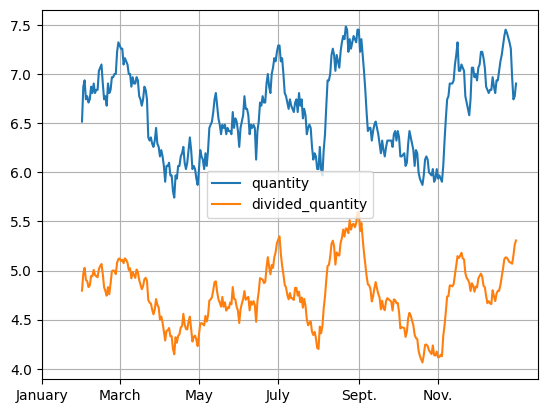

In [19]:
ingredient = "Gouda Cheese"

has_ingredient_list = sales["pizza_ingredients"].apply(lambda ingredients_list: ingredient in ingredients_list)
ingredient_sales_by_day = sales[has_ingredient_list][["order_date_index", "quantity"]].groupby("order_date_index").sum()

out = pandas.DataFrame(columns = ["quantity"])
for order_date_index in daily_sales.index:
    try:
        sales_today = ingredient_sales_by_day["quantity"][order_date_index]
    except:
        sales_today = 0
    out.loc[order_date_index] = sales_today

out["divided_quantity"] = out["quantity"]/daily_sales["item_count"]

rollingAnalysis.plotRollingData(["quantity", "divided_quantity"], out, 30, scales = [1, 100])

pyplot.xticks([0, 60, 121, 182, 244, 305], ["January", "March", "May", "July", "Sept.", "Nov."])
pyplot.grid()

# selective analysis:
# the popularity of pineapple has definitely gone up
# the popularity of sun dried tomatoes seems to have gone up
# the popularity of zucchini shows (potentially) a seasonal preference for winter, lasting into spring. more data required!

In [20]:
def manipulateRow(row):
    row.iloc[0] /= len(row.iloc[1])
    return row

pandas.set_option("display.max_rows", 65)
ingredient_properties.apply(manipulateRow, axis = 1).sort_values("quantity_sold", ascending = False)
# the barbecue and hawaiian pizzas are disproportionately popular

,quantity_sold,pizza_types_containing
Barbecue Sauce,2432.000000,['The Barbecue Chicken Pizza']
Barbecued Chicken,2432.000000,['The Barbecue Chicken Pizza']
Sliced Ham,2422.000000,['The Hawaiian Pizza']
Pineapple,2396.500000,"['The Thai Chicken Pizza', 'The Hawaiian Pizza']"
Thai Sweet Chilli Sauce,2371.000000,['The Thai Chicken Pizza']
Bacon,2183.500000,"['The Classic Deluxe Pizza', 'The Big Meat Piz..."
Coarse Sicilian Salami,1938.000000,['The Sicilian Pizza']
Luganega Sausage,1938.000000,['The Sicilian Pizza']
Peperoncini verdi,1924.000000,['The Spicy Italian Pizza']
Jalapeno Peppers,1923.666667,"['The Southwest Chicken Pizza', 'The Mexicana ..."


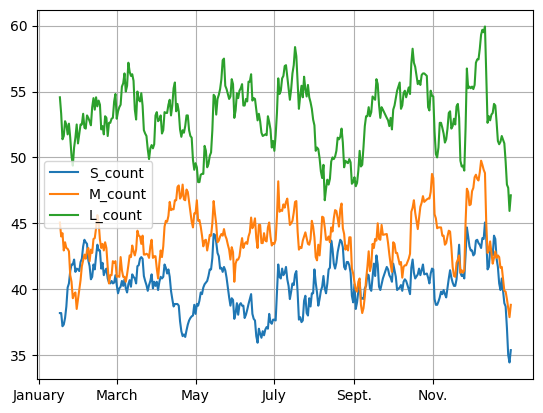

In [21]:
# only greek can be in XL and XXL, so we just leave those two out
for size in ["S", "M", "L"]:
    size_sales_by_day = sales[sales["pizza_size"] == size][["order_date_index", "quantity"]].groupby("order_date_index").sum()
    out = pandas.DataFrame(columns = ["%s_count" %(size)])
    for order_date_index in daily_sales.index:
        try:
            sales_today = size_sales_by_day["quantity"][order_date_index]
        except:
            sales_today = 0
        out.loc[order_date_index] = sales_today

    rollingAnalysis.plotRollingData(["%s_count" %(size)], out, 15)

pyplot.xticks([0, 60, 121, 182, 244, 305], ["January", "March", "May", "July", "Sept.", "Nov."])
pyplot.grid()
# evidently people like the large pizzas most

In [22]:
# for thoroughness, we'll use a spearman R test for testing against pricing
plotGrid.gridSpearmanTest(pizza_properties.drop(["The Four Cheese Pizza", "The Five Cheese Pizza"]), ["quantity_sold", "price_S"], significance = 1)
plotGrid.gridSpearmanTest(pizza_properties.drop(["The Big Meat Pizza", "The Five Cheese Pizza", "The Brie Carre Pizza"]), ["quantity_sold", "price_M"], significance = 1)
plotGrid.gridSpearmanTest(pizza_properties.drop(["The Big Meat Pizza", "The Brie Carre Pizza"]), ["quantity_sold", "price_L"], significance = 1)

# it's absolutely clear that there's no correlation between the price of a pizza and how well it sells

price_S / quantity_sold: -0.17561400815390585 p: 0.35327902646644616
price_M / quantity_sold: -0.09717622346934607 p: 0.6160329168205587
price_L / quantity_sold: -0.1307871267417021 p: 0.49089892663902135


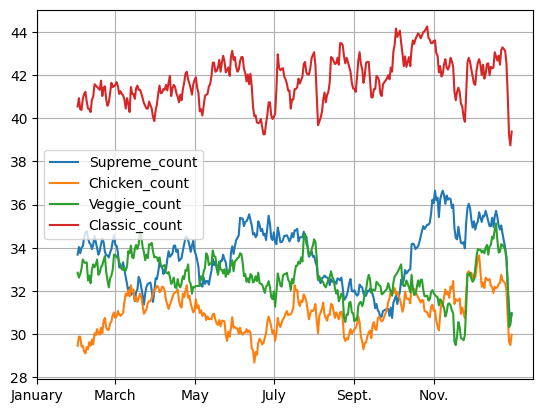

In [33]:
for category in ["Supreme", "Chicken", "Veggie", "Classic"]:
    category_sales_by_day = sales[sales["pizza_category"] == category][["order_date_index", "quantity"]].groupby("order_date_index").sum()
    out = pandas.DataFrame(columns = ["%s_count" %(category)])
    for order_date_index in daily_sales.index:
        try:
            sales_today = category_sales_by_day["quantity"][order_date_index]
        except:
            sales_today = 0
        out.loc[order_date_index] = sales_today

    rollingAnalysis.plotRollingData(["%s_count" %(category)], out, 30)

pyplot.xticks([0, 60, 121, 182, 244, 305], ["January", "March", "May", "July", "Sept.", "Nov."])
pyplot.grid()
# evidently classic pizzas sell the most

In [30]:
# this ends up getting a count of the types of pizzas
pizza_properties["category"].value_counts()

category
Veggie     9
Supreme    9
Classic    8
Chicken    6
Name: count, dtype: int64

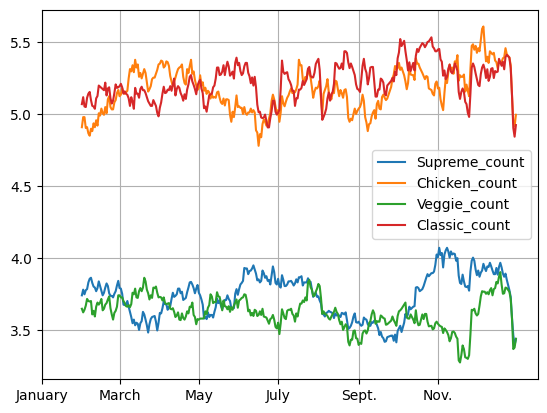

In [31]:
for category in ["Supreme", "Chicken", "Veggie", "Classic"]:
    modifier = pizza_properties["category"].value_counts()[category]
    size_sales_by_day = sales[sales["pizza_category"] == category][["order_date_index", "quantity"]].groupby("order_date_index").sum()
    out = pandas.DataFrame(columns = ["%s_count" %(category)])
    for order_date_index in daily_sales.index:
        try:
            sales_today = size_sales_by_day["quantity"][order_date_index]
        except:
            sales_today = 0
        out.loc[order_date_index] = sales_today

    rollingAnalysis.plotRollingData(["%s_count" %(category)], out, 30, scales=[1/modifier])

pyplot.xticks([0, 60, 121, 182, 244, 305], ["January", "March", "May", "July", "Sept.", "Nov."])
pyplot.grid()
# however, it is actually the case that chicken and classic pizzas are equally as popular
# but there are less chicken pizzas than classic pizzas.
# so adjusting by the # of each type of pizza we have that they actually make up a category of more popular pizzas overall!

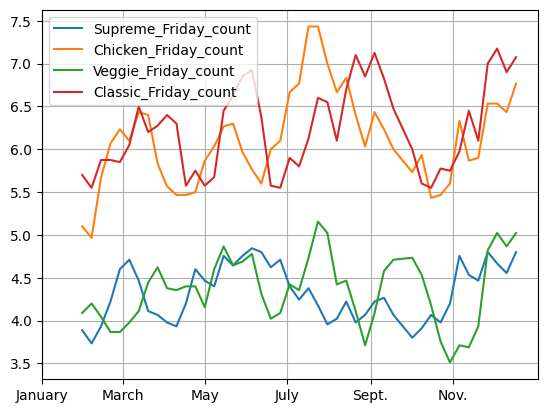

In [32]:
for category in ["Supreme", "Chicken", "Veggie", "Classic"]:
    for weekday in ["Friday"]:
        modifier = pizza_properties["category"].value_counts()[category]
        size_sales = sales[sales["pizza_category"] == category]
        weekday_sales = size_sales[size_sales["order_date_weekday"] == weekday]
        sales_by_day = weekday_sales[["order_date_index", "quantity"]].groupby("order_date_index").sum()
        out = pandas.DataFrame(columns = ["%s_%s_count" %(category, weekday)])
        for order_date_index in daily_sales.index:
            try:
                sales_today = sales_by_day["quantity"][order_date_index]
            except:
                continue
            out.loc[order_date_index] = sales_today

        rollingAnalysis.plotRollingData(["%s_%s_count" %(category, weekday)], out, 4, scales=[1/modifier], legend = True)

pyplot.xticks([0, 60, 121, 182, 244, 305], ["January", "March", "May", "July", "Sept.", "Nov."])
pyplot.grid()

# big jump on thanksgiving
# sales on fridays CLIMBED at the end of the year as opposed to every other day (except sunday, which was stable)